* Jeremy Beard
* Due 20220320
* Week 2
* MSDS650
* Genie Hays


# Week 2 Lab - Calculating Probability and Proportion

<img align="left" style="padding-right:10px;" src="figures_wk2/sampling_bias.png" width=400>

This week's assignment will give you some practice calculating and interpretting probablity and proportions.

**Dataset Name::** flights.csv, airlines.csv, airports.csv (found in the assign_wk2 folder)<br>
You really only need the flights.csv to complete the assignment, however, the other two datasets provide some reference info that you might find interesting. 

Since the original flights dataset has **lots** of missing data, I have provided a cleaned up version for you to use (flights_clean.csv). I have also provided the notebook that I used to clean up the dataset (Clean_Flights_Data). 

For those of you who wish to try your hand at data cleaning, I have provided a notebook demonstrating data imputation data (Demo_Imputing_Data). You get to decide which version of the dataset you wish to use.

# Assignment Requirements
Here are the requirements for this week's assignment:
* Load your choice of dataset (either flights.csv **OR** flights_clean.csv)
   - If you are going to clean the dataset yourself, here are some hints:
      * Warning!! You are going to need some of the rows/columns with missing values, so don't just throw them away while creating your dataframe
      * The column 'ARRIVAL_DELAY' tells you the number of minutes the flight actually arrived verses the scheduled arrival. There are a fair number of missing values for this column, impute (see Demo_Imputing_Data for ideas) this column. Document your approach!
      * Hint: A negative number means the flight arrived early.
      * Hint: What other columns might you use to fill in this missing data.
   - If you are going to start with cleaned_dataset, I encourage you to look at what I did to clean up this data. It will help you going forward   


* Provide an analysis of delayed flights based on the airport the flight originated from. Your analysis should answer the following questions.
    1) Determine the originaing airport with the largest proportion of flights arriving late to their destination. Do the same for the airport with the smallest proportion. 
    2) What is the probablity a flight leaving from a given airport will arrive at its destination late?  
        * Hint: Calculate the probablity of late arrival at destination for each originating airport.
    3) What is the mean and std of late arrival times for both of these airports.
        * Based on the mean and std information ONLY, which airport seems like a better choice?
    4) Define a question that would utilize Bernoulli's Equation and preform a calculation to support your question.
    5) Provide a summary of all the values that you calculated for 3 airports
        * Compare the three to each other.
        * Which airport would you prefer to fly out of based on your results.
     

# Deliverables
Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.

# I. Introduction
In this week's assignment, the flights_clean.csv dataset was used (thank you for doing the work cleaning the data!)
The main idea of this week's assignment was calculating delayed arrivals from flights coming from different originating airports. I chose to analyze the Denver, Chicago, and Atlanta airports. Basic statistics were calculated on the data and proportions and probabilities were found. Bernoulli's equation was also involved and you will see what question I answered using Bernoulli's equation.

# II. Methods, III. Code, and IV. Analysis of Results
First, I load the data. Again, I chose to use the cleaned data as that eliminated a lot of the work I would have to do to clean the data.
After loading the data, I then look at the metadata using shape() and info() functions.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#Load your choice of dataset (either flights.csv OR flights_clean.csv)
##If you are going to clean the dataset yourself, here are some hints:
###Warning!! You are going to need some of the rows/columns with missing values, so don't just throw them away while creating your dataframe
###The column 'ARRIVAL_DELAY' tells you the number of minutes the flight actually arrived verses the scheduled arrival. There are a fair number of missing values for this column, impute (see Demo_Imputing_Data for ideas) this column. Document your approach!
###Hint: A negative number means the flight arrived early.
###Hint: What other columns might you use to fill in this missing data.
##If you are going to start with cleaned_dataset, I encourage you to look at what I did to clean up this data. It will help you going forward
data_df = pd.read_csv('assign_wk2/flights_clean.csv')

In [3]:
data_df.head(10)

,year,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,320,259.0,-21.0,0,0
5,2015,1,1,4,DL,806,SFO,MSP,25,20.0,-5.0,217.0,230.0,602,610.0,8.0,0,0
6,2015,1,1,4,NK,612,LAS,MSP,25,19.0,-6.0,181.0,170.0,526,509.0,-17.0,0,0
7,2015,1,1,4,US,2013,LAX,CLT,30,44.0,14.0,273.0,249.0,803,753.0,-10.0,0,0
8,2015,1,1,4,AA,1112,SFO,DFW,30,19.0,-11.0,195.0,193.0,545,532.0,-13.0,0,0
9,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,221.0,203.0,711,656.0,-15.0,0,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245484 entries, 0 to 5245483
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   day_of_week          int64  
 4   airline              object 
 5   flight_number        int64  
 6   origin_airport       object 
 7   destination_airport  object 
 8   scheduled_departure  int64  
 9   departure_time       float64
 10  departure_delay      float64
 11  scheduled_time       float64
 12  elapsed_time         float64
 13  scheduled_arrival    int64  
 14  arrival_time         float64
 15  arrival_delay        float64
 16  diverted             int64  
 17  cancelled            int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 720.4+ MB


In [5]:
data_df.shape

(5245484, 18)

In [6]:
og_airport_counts = data_df.groupby('origin_airport').size()
og_airport_counts.head(30)

origin_airport
ABE      2235
ABI      2232
ABQ     18980
ABR       663
ABY       867
ACK       486
ACT      1539
ACV      1269
ACY      3532
ADK        89
ADQ       437
AEX      3060
AGS      2346
AKN        63
ALB      7341
ALO       582
AMA      4080
ANC     15881
APN       547
ASE      3286
ATL    344279
ATW      2765
AUS     41489
AVL      2684
AVP      1331
AZO      1743
BDL     18437
BET       880
BFL      2595
BGM       259
dtype: int64

### Question 1
After loading the data and looking at its metadata, I sought to answer the question "what is the originating airport with the largest proportion of flights arriving late?"
I first created a 'late' column based on if the flight arrived late or not. This could easily be determined by looking at the arrival_delay column but I wanted to make the information more explicit by using True/False boolean values.

In [7]:
#Provide an analysis of delayed flights based on the airport the 
#flight originated from. Your analysis should answer the following questions. 

#1) Determine the originaing airport with the largest proportion of flights arriving late to their destination. 
##Do the same for the airport with the smallest proportion. 
data_df.isnull().sum()
data_df['late'] = data_df.arrival_delay.apply(lambda x: x > 0)
data_df.head(10)

,year,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,late
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,430,408.0,-22.0,0,0,False
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,750,741.0,-9.0,0,0,False
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,806,811.0,5.0,0,0,True
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,805,756.0,-9.0,0,0,False
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,320,259.0,-21.0,0,0,False
5,2015,1,1,4,DL,806,SFO,MSP,25,20.0,-5.0,217.0,230.0,602,610.0,8.0,0,0,True
6,2015,1,1,4,NK,612,LAS,MSP,25,19.0,-6.0,181.0,170.0,526,509.0,-17.0,0,0,False
7,2015,1,1,4,US,2013,LAX,CLT,30,44.0,14.0,273.0,249.0,803,753.0,-10.0,0,0,False
8,2015,1,1,4,AA,1112,SFO,DFW,30,19.0,-11.0,195.0,193.0,545,532.0,-13.0,0,0,False
9,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,221.0,203.0,711,656.0,-15.0,0,0,False


In [8]:
lateCounts = data_df[data_df.late == True].groupby('origin_airport').size().sort_values(ascending=False)
lateCounts

origin_airport
ATL    115034
ORD    113413
DFW     93195
DEN     80870
LAX     79754
        ...  
VEL        23
HYA        21
DLG        17
ITH        14
CNY         8
Length: 322, dtype: int64

In [9]:
notLateCounts = data_df[data_df.late == False].groupby('origin_airport').size().sort_values(ascending=False)
notLateCounts

origin_airport
ATL    229245
ORD    163923
DFW    140102
DEN    113062
LAX    112755
        ...  
PPG        40
ADK        32
AKN        31
GST        25
ITH        16
Length: 322, dtype: int64

I calculated the proportion of late arrivals based on originating airport by counting the number of late arrivals based on the origin_airport column. I then added a column that divides the number of late counts for the airport by the total number of flight counts for that airport.

In [10]:
og_airport_lateCounts = data_df.groupby(['origin_airport', 'late']).size().unstack().reset_index()
cols = ['origin_airport', 'not_late', 'late']
og_airport_lateCounts.columns = cols
og_airport_lateCounts['total'] = og_airport_lateCounts.not_late + og_airport_lateCounts.late
og_airport_lateCounts['late_prop'] = og_airport_lateCounts.late/og_airport_lateCounts.total
og_airport_lateCounts.head(30)



,origin_airport,not_late,late,total,late_prop
0,ABE,1409,826,2235,0.369575
1,ABI,1546,686,2232,0.307348
2,ABQ,12008,6972,18980,0.367334
3,ABR,417,246,663,0.371041
4,ABY,558,309,867,0.356401
5,ACK,324,162,486,0.333333
6,ACT,1073,466,1539,0.302794
7,ACV,820,449,1269,0.353822
8,ACY,2099,1433,3532,0.405719
9,ADK,32,57,89,0.640449


After calculating the proportions, I sorted the proportion values by increasing and decreasing values. As you can see, the highest proportion of late arrivals was found in GST airport, in Gustavus, Alaska. The lowest proportion of late arrivals was found at the CNY airport, the Canyonlands Regional Airport.

In [11]:
og_airport_lateCounts = og_airport_lateCounts.sort_values('late_prop', ascending=False)
og_airport_lateCounts.head(30)

,origin_airport,not_late,late,total,late_prop
133,GST,25,51,76,0.671053
9,ADK,32,57,89,0.640449
246,PPG,40,67,107,0.626168
154,ILG,42,53,95,0.557895
13,AKN,31,32,63,0.507937
258,RHI,479,460,939,0.489883
226,OME,325,311,636,0.488994
293,STC,40,38,78,0.487179
71,COD,340,313,653,0.479326
90,DLH,889,778,1667,0.466707


In [12]:
og_airport_lateCounts = og_airport_lateCounts.sort_values('late_prop', ascending=True)
og_airport_lateCounts.head(20)

,origin_airport,not_late,late,total,late_prop
70,CNY,197,8,205,0.039024
314,VEL,177,23,200,0.115000
46,BTM,549,99,648,0.152778
189,LWS,491,97,588,0.164966
88,DIK,730,191,921,0.207383
98,EKO,405,112,517,0.216634
89,DLG,60,17,77,0.220779
32,BIL,2220,633,2853,0.221872
119,GCC,766,220,986,0.223124
102,ESC,430,126,556,0.226619


### Question 2
After answering the questions on proportion, I then sought to answer the question "What is the probablity a flight leaving from a given airport will arrive at its destination late?" I mainly followed the SampleAssignment provided by Professor Hayes. Since a probability is based on the total number of outcomes, these probabilities were calculated based on the total number of flights available from the dataset.

In [13]:
#2) What is the probablity a flight leaving from a given airport will arrive at its destination late?
##  * Hint: Calculate the probablity of late arrival at destination for each originating airport.

lateFlights = data_df[data_df.late == True].groupby('origin_airport').size()
lateFlights

origin_airport
ABE     826
ABI     686
ABQ    6972
ABR     246
ABY     309
       ... 
WRG     236
WYS      58
XNA    3728
YAK     162
YUM     627
Length: 322, dtype: int64

In [14]:
# I will now calculate the probabilities of late arrivals for all origin_airports
# source: SampleAssignment_Week1_Hays
data_df[(data_df.late == True) & (data_df.origin_airport == 'DEN')]

,year,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,late
29,2015,1,1,4,AA,2392,DEN,MIA,120,141.0,21.0,227.0,208.0,707,709.0,2.0,0,0,True
82,2015,1,1,4,AA,328,DEN,DFW,530,623.0,53.0,125.0,138.0,835,941.0,66.0,0,0,True
123,2015,1,1,4,OO,2599,DEN,LAX,545,658.0,73.0,150.0,133.0,715,811.0,56.0,0,0,True
568,2015,1,1,4,F9,1246,DEN,DFW,630,634.0,4.0,110.0,123.0,920,937.0,17.0,0,0,True
672,2015,1,1,4,F9,110,DEN,MSP,645,711.0,26.0,115.0,105.0,940,956.0,16.0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244861,2015,12,31,4,F9,242,DEN,IAH,2040,2054.0,14.0,136.0,143.0,2356,17.0,21.0,0,0,True
5244929,2015,12,31,4,F9,332,DEN,MSP,2055,2125.0,30.0,118.0,113.0,2353,18.0,25.0,0,0,True
5244939,2015,12,31,4,WN,5215,DEN,TUS,2055,2109.0,14.0,115.0,108.0,2250,2257.0,7.0,0,0,True
5245141,2015,12,31,4,F9,761,DEN,LAS,2148,2141.0,-7.0,112.0,139.0,2240,2300.0,20.0,0,0,True


In [15]:
total_flights = len(data_df)
total_flights

5245484

In [16]:
prob_delay_airport = lateFlights.apply(lambda x: x/total_flights)
prob_delay_airport = prob_delay_airport.sort_values(ascending=False)
prob_delay_airport

origin_airport
ATL    0.021930
ORD    0.021621
DFW    0.017767
DEN    0.015417
LAX    0.015204
         ...   
VEL    0.000004
HYA    0.000004
DLG    0.000003
ITH    0.000003
CNY    0.000002
Length: 322, dtype: float64

In [17]:
# a bit nicer output for all the origin_airports (still following the example, thank you!)
for i in prob_delay_airport.items():
    p_delay = '%.6f'%(i[1]*100)
    print(f'A flight from {i[0]} has a {p_delay}% probability of having a delayed arrival.')

A flight from ATL has a 2.193010% probability of having a delayed arrival.
A flight from ORD has a 2.162107% probability of having a delayed arrival.
A flight from DFW has a 1.776671% probability of having a delayed arrival.
A flight from DEN has a 1.541707% probability of having a delayed arrival.
A flight from LAX has a 1.520432% probability of having a delayed arrival.
A flight from IAH has a 1.142011% probability of having a delayed arrival.
A flight from PHX has a 1.112462% probability of having a delayed arrival.
A flight from SFO has a 1.072179% probability of having a delayed arrival.
A flight from LAS has a 1.009497% probability of having a delayed arrival.
A flight from SEA has a 0.831096% probability of having a delayed arrival.
A flight from CLT has a 0.790814% probability of having a delayed arrival.
A flight from MCO has a 0.788869% probability of having a delayed arrival.
A flight from BOS has a 0.740065% probability of having a delayed arrival.
A flight from MSP has a 0

### Question 3
After computing the probabilities, I moved onto question 3: "What is the mean and std of late arrival times for both of these airports?" Since question 5 deals with comparing 3 airports, I decided to find the mean and std of late arrival times for 3 airports: Denver, Chicago, and Atlanta. To compute these basic statistics, I filtered the data by only delayed arrival times, and then used the describe() function.

In [18]:
#3) What is the mean and std of late arrival times for both of these airports?
##  * Based on the mean and std information ONLY, which airport seems like a better choice?

#For question #3, I will choose 3 airports: DEN, ORD, and ATL, Denver, Chicago, and Atlanta.
#I am choosing 3 airports so question #5 will be easier to answer
#I notice that the question only specifies mean/std of LATE arrival times.
#Therefore, I will only consider the data from DEN which are late arrival times.
delay_stat = data_df[(data_df.late == True)].groupby('origin_airport').arrival_delay.describe()
delay_stat

,count,mean,std,min,25%,50%,75%,max
origin_airport,,,,,,,,
ABE,826.0,36.483051,63.478274,1.0,5.00,14.0,35.0,612.0
ABI,686.0,39.295918,63.122970,1.0,6.00,15.0,46.0,583.0
ABQ,6972.0,33.444923,82.563811,1.0,6.00,14.0,35.0,2194.0
ABR,246.0,42.211382,112.170443,1.0,6.00,13.5,29.0,916.0
ABY,309.0,37.530744,58.046303,1.0,5.00,15.0,46.0,454.0
...,...,...,...,...,...,...,...,...
WRG,236.0,31.881356,45.870710,1.0,5.00,14.0,35.0,259.0
WYS,58.0,18.034483,37.468099,1.0,2.25,5.0,14.5,194.0
XNA,3728.0,43.436427,77.550802,1.0,6.00,17.0,49.0,2100.0


In [19]:
# Now will filter delay_stat to find mean/std for DEN, ORD, and ATL
delay_stat.loc['DEN']

count    80870.000000
mean        34.795994
std         76.862392
min          1.000000
25%          6.000000
50%         16.000000
75%         40.000000
max       2308.000000
Name: DEN, dtype: float64

In [20]:
delay_stat.loc['ORD']

count    113413.000000
mean         40.924092
std          74.904126
min           1.000000
25%           8.000000
50%          20.000000
75%          50.000000
max        2287.000000
Name: ORD, dtype: float64

In [21]:
delay_stat.loc['ATL']

count    115034.000000
mean         32.920658
std          76.114586
min           1.000000
25%           5.000000
50%          14.000000
75%          36.000000
max        2276.000000
Name: ATL, dtype: float64

In [22]:
#Based on these 3 airports data, the Atlanta airport (ATL) has
# a lower mean delay than either the Chicago airport (ORD) or the Denver airport (DEN)
#Therefore, I would rather have a flight originating from ATL than ORD or DEN.
#All 3 of these airports have similar standard deviations so not much consideration 
#was given to the standard deviations of the 3 airports.

### Aside: Histograms
After comparing the means and standard deviations of the 3 airports, I saw that the Atlanta airport had the lowest delay for arrival time. That seems to be the preferable airport when only considering the means and standard deviations. The example I was following went on to create histograms of how much the flight arrived delayed. I wanted to also visualize the data a bit so I created histograms of each of the 3 airports in question.

<AxesSubplot:>

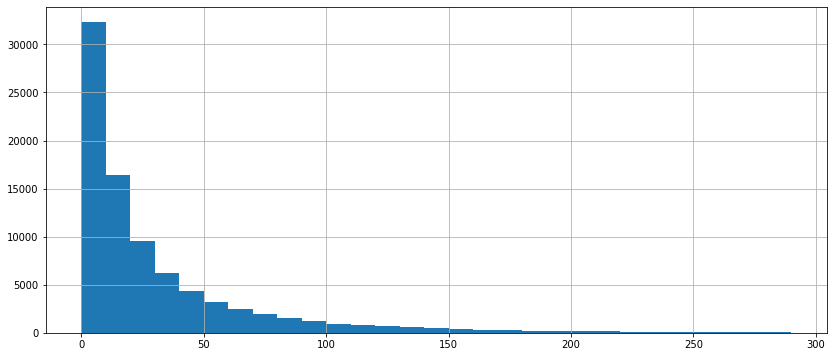

In [23]:
bin_values = np.arange(start=0, stop=300, step=10)
den_delays = data_df[(data_df.origin_airport == 'DEN')]
den_delays.arrival_delay.hist(bins=bin_values, figsize=[14,6])

<AxesSubplot:>

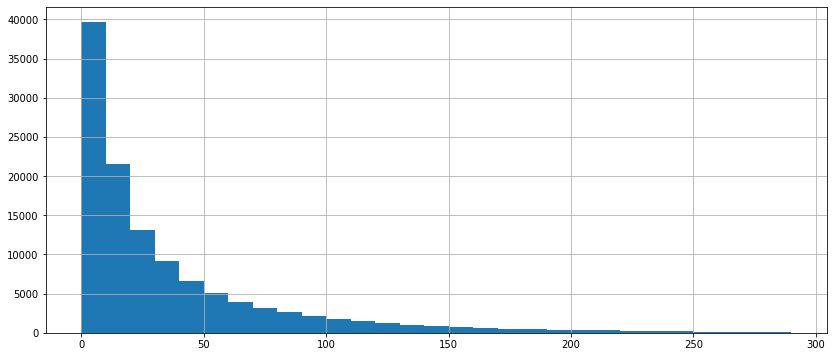

In [24]:
ord_delays = data_df[(data_df.origin_airport == 'ORD')]
ord_delays.arrival_delay.hist(bins=bin_values, figsize=[14,6])

<AxesSubplot:>

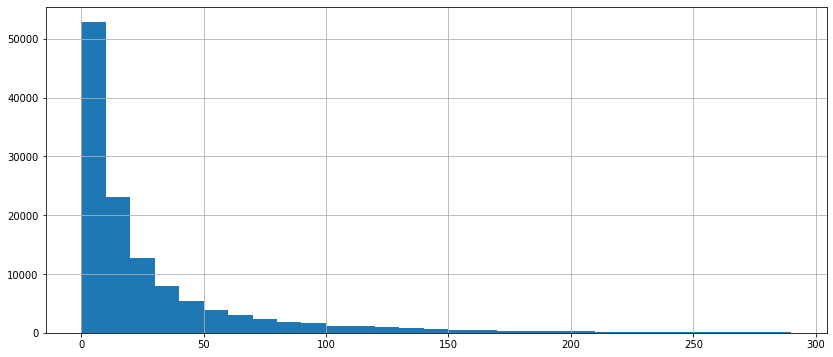

In [25]:
atl_delays = data_df[(data_df.origin_airport == 'ATL')]
atl_delays.arrival_delay.hist(bins=bin_values, figsize=[14,6])

### Question 4
Question 4 dealt with utilizing Bernoulli's equation. I wanted to see what the probabilities were of there being either 3% or 0.5% of flights per day delayed at the airport in question. I computed these 2 probabilities for each of the 3 airports using Bernoulli's equation.

In [26]:
#4) Define a question that would utilize Bernoulli's Equation and perform a 
##calculation to support your question. 
#my question will be: What is the probability that 3% of flights per day
# from DEN arrive late at their destination?
prob_den = prob_delay_airport['DEN']
prob_ord = prob_delay_airport['ORD']
prob_atl = prob_delay_airport['ATL']


avg_daily = round(data_df.groupby(['month','day']).size().mean())
avg_daily

15705

In [27]:
pmf_den = stats.binom.pmf(round(0.03*avg_daily), n=avg_daily, p=prob_den)
pmf_den

6.61695550975658e-40

In [28]:
#therefore, there is a veeeeery small chance that 3% of flights per day are late from DEN
#now, what about just 0.5% of flights?
pmf_den = stats.binom.pmf(round(0.005*avg_daily), n=avg_daily, p=prob_den)
pmf_den

7.288349504757996e-35

In [29]:
pmf_ord = stats.binom.pmf(round(0.03*avg_daily), n=avg_daily, p=prob_ord)
pmf_ord

1.5080216339591587e-12

In [30]:
pmf_ord = stats.binom.pmf(round(0.005*avg_daily), n=avg_daily, p=prob_ord)
pmf_ord

3.7076640273336703e-66

In [31]:
pmf_atl = stats.binom.pmf(round(0.03*avg_daily), n=avg_daily, p=prob_atl)
pmf_atl

9.801856178088144e-12

In [32]:
pmf_atl = stats.binom.pmf(round(0.005*avg_daily), n=avg_daily, p=prob_atl)
pmf_atl

8.169095244079916e-68

In [33]:
og_airport_lateCounts[og_airport_lateCounts.origin_airport == 'DEN']

,origin_airport,not_late,late,total,late_prop
85,DEN,113062,80870,193932,0.417002


In [34]:
og_airport_lateCounts[og_airport_lateCounts.origin_airport == 'ORD']

,origin_airport,not_late,late,total,late_prop
228,ORD,163923,113413,277336,0.408937


In [35]:
og_airport_lateCounts[og_airport_lateCounts.origin_airport == 'ATL']

,origin_airport,not_late,late,total,late_prop
20,ATL,229245,115034,344279,0.33413


### 5) Provide a summary of all the values that you calculated for 3 airports
####   Compare the three to each other.
####   Which airport would you prefer to fly out of based on your results.

I compared the airports of Denver, Chicago, and Atlanta. I found the following from my calculations:

Denver Airport (DEN):
* 1.541707% probability of delayed arrival.
* mean delay: 34.795994
* std delay: 76.862392
* From Denver, 80870 of 193932 flights had a delayed arrival, a proportion of 0.417002.
* Using Bernoulli's equation, the probability of 3% of flights arriving delayed from DEN was 6.62e-40.
* Using Bernoulli's equation, the probability of 0.5% of flights arriving delayed from DEN was 7.29e-35.

Chicago Airport (ORD):
* 2.162107% probability of delayed arrival.
* mean delay: 40.924092
* std delay: 74.904126
* From Chicago, 113413 of 277336 flights had a delayed arrival, a proportion of 0.408937.
* Using Bernoulli's equation, the probability of 3% of flights arriving delayed from ORD was 1.51e-12.
* Using Bernoulli's equation, the probability of 0.5% of flights arriving delayed from ORD was 3.71e-66.

Atlanta Airport (ATL):
* 2.193010% probability of delayed arrival.
* mean delay: 32.920658
* std delay: 76.114586
* From Atlanta, 115034 of 344279 flights had a delayed arrival, a proportion of 0.33413.
* Using Bernoulli's equation, the probability of 3% of flights arriving delayed from ATL was 9.80e-12.
* Using Bernoulli's equation, the probability of 0.5% of flights arriving delayed from ATL was 8.17e-68.

This was a difficult comparison! All 3 of these airports have a high number of delays. Atlanta had the lowest proportion of actual delayed arrivals, while Denver had the lowest probability of delayed arrivals. Atlanta also had the lowest average time delay per delayed flight. Given all of the above, I definitely would not choose the Chicago airport. Between Denver and Atlanta however, I think I would choose the Atlanta airport because I trust the proportion more, the actual data, and Atlanta has the lowest proportion of delayed arrivals. 



# V. Conclusion
This assignment was interesting as it dealt with real airport data! My parents fly a lot so I shared some of the findings from here with them. They were really interested at seeing the dataset, and weren't surprised at all to see some of those airports as the most delayed. I was a bit confused at exactly what the Bernoulli's equation probabilities were telling me as the probabilities found using the equation were extremely low. This didn't seem realistic, but then I thought that finding the probability of a precise percentage of flights delayed may be a very low probability indeed. Thank you! Please let me know if you have any questions.

All the best,
Jeremy

# VI. References

MSDS 650 - Week 2 Content:

1.) Class datasets provided for this assignment: flights_clean.csv

2.) From the Experts PDF: Week 2

3.) Sample Assignment (Jupyter Notebook) provided by Professor Hayes